<a href="https://colab.research.google.com/github/laxmipunnam/AI_ML_BootCamp_Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/cmp_placement_dataset.csv')

In [ ]:
df.head()

,RegNo,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
0,T150054001,11,11,10,11,10.00,4.3,6.2,7.4,8.3,8.1,8.0,1
1,T150054002,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4,1
2,T150054003,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4,1
3,T150054004,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6,0
4,T150054005,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4,0


In [ ]:
df.shape

(365, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RegNo             365 non-null    object 
 1   Quants            365 non-null    int64  
 2   LogicalReasoning  365 non-null    int64  
 3   Verbal            365 non-null    int64  
 4   Programming       365 non-null    int64  
 5   CGPA              365 non-null    float64
 6   Networking        365 non-null    float64
 7   CloudComp         365 non-null    float64
 8   WebServices       365 non-null    float64
 9   DataAnalytics     365 non-null    float64
 10  QualityAssurance  365 non-null    float64
 11  AI                365 non-null    float64
 12  Placed            365 non-null    int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 37.2+ KB


In [ ]:
df.isnull()

,RegNo,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()   #checking null values in dataset & adding them with respect to features


RegNo               0
Quants              0
LogicalReasoning    0
Verbal              0
Programming         0
CGPA                0
Networking          0
CloudComp           0
WebServices         0
DataAnalytics       0
QualityAssurance    0
AI                  0
Placed              0
dtype: int64

In [ ]:
#this function shows the count of the categorical data(here it is state column)
df["RegNo"].value_counts()

T150054001    1
T150054252    1
T150054250    1
T150054249    1
T150054248    1
             ..
T150054121    1
T150054120    1
T150054119    1
T150054118    1
T150054365    1
Name: RegNo, Length: 365, dtype: int64

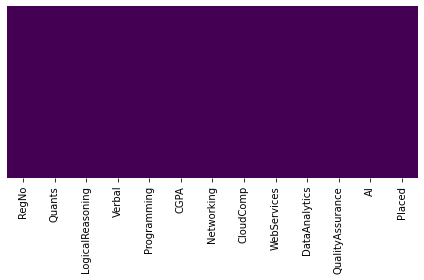

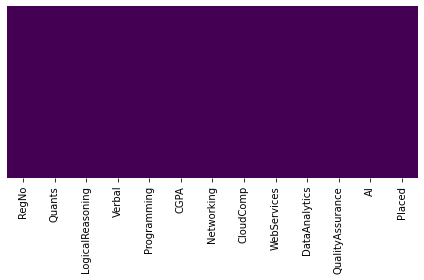

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


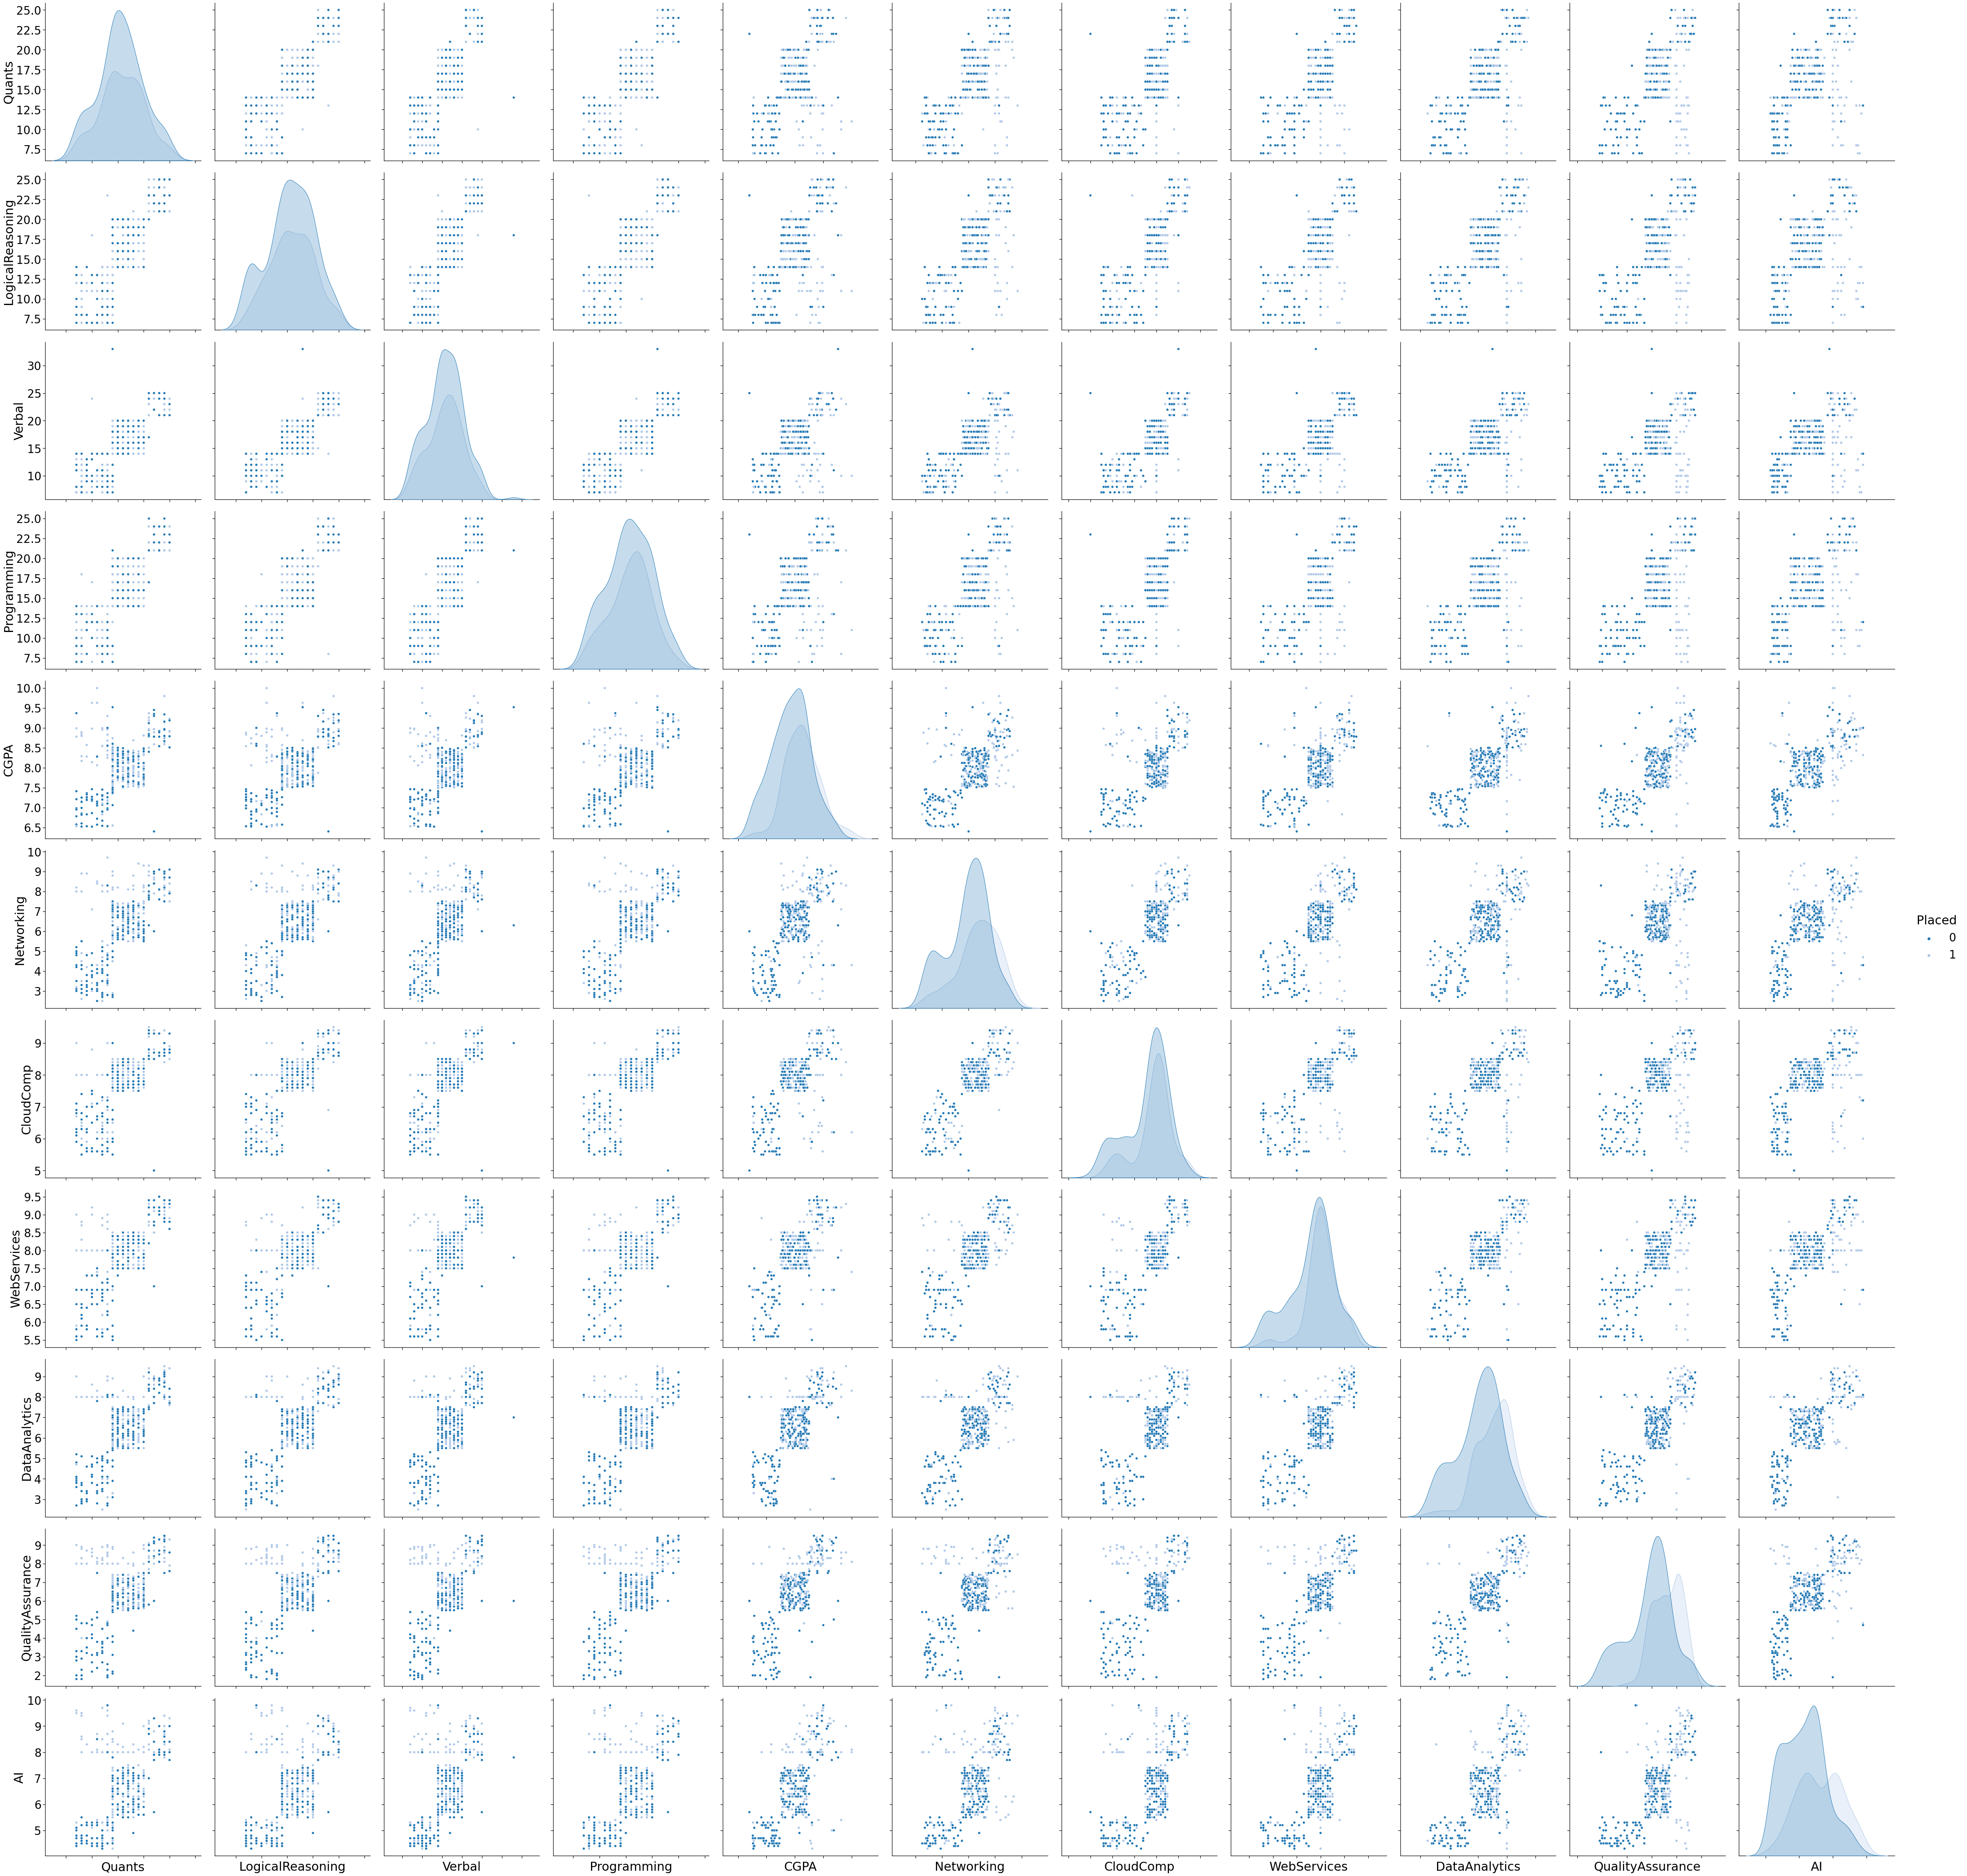

In [ ]:
#Understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
  g=sns.pairplot(df[['RegNo','Quants','LogicalReasoning','Verbal','Programming','CGPA','Networking','CloudComp','WebServices','DataAnalytics','QualityAssurance','AI','Placed']],hue='Placed',palette='tab20',size=6)
g.set(xticklabels=[]);

<function matplotlib.pyplot.show>

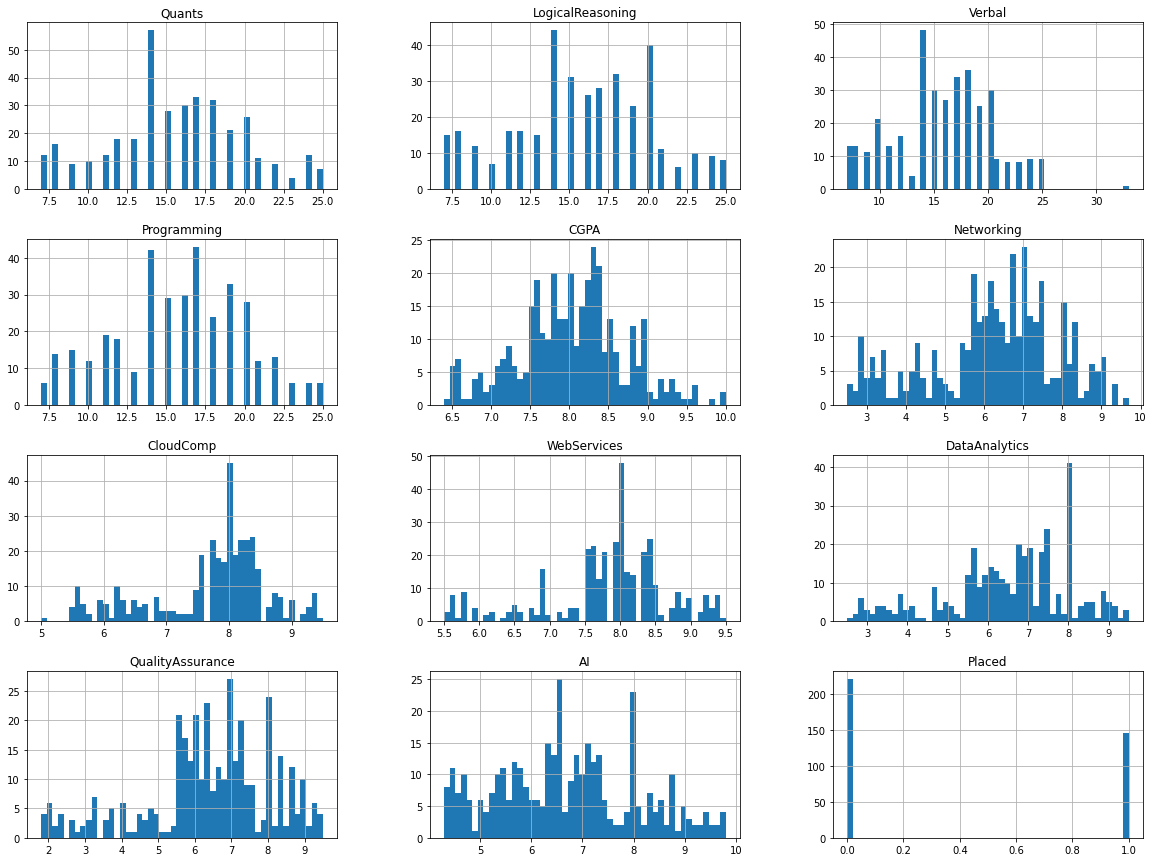

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show

In [ ]:
#data processing
from sklearn import preprocessing  
#labelencoding
LE=preprocessing.LabelEncoder()
#fitting it to our dataset
df.RegNo=LE.fit_transform(df.RegNo)

In [ ]:
from matplotlib.axis import YTick
#method 2 to load the data in the form of arrays -by library numpy
import numpy as np
X=np.array(df[['RegNo','Quants','LogicalReasoning','Verbal','Programming','CGPA','Networking','CloudComp','WebServices','DataAnalytics','QualityAssurance','AI']])
Y=np.array(df[['Placed']])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.72731195e+00, -1.08949036e+00, -1.07666461e+00, ...,
         1.17018808e+00,  9.71971146e-01,  9.69604472e-01],
       [-1.71782122e+00, -1.79207690e+00, -1.30071398e+00, ...,
         9.75275403e-01,  1.08721216e+00,  2.00593136e+00],
       [-1.70833050e+00, -1.08949036e+00, -1.07666461e+00, ...,
         9.75275403e-01,  9.14350638e-01, -9.55002606e-01],
       ...,
       [ 1.70833050e+00, -1.52708307e-01, -4.04516522e-01, ...,
         1.30653796e-01, -2.95680032e-01, -6.58909210e-01],
       [ 1.71782122e+00, -1.52708307e-01,  2.67631568e-01, ...,
         3.25566474e-01, -6.51979996e-02, -6.67224161e-02],
       [ 1.72731195e+00,  1.01826926e+00,  4.35822049e-02, ...,
         7.12009785e-04,  3.95766065e-01,  4.51441028e-01]])

In [ ]:
#load the data
X = df.iloc[:,:-1].values#independent -- message
Y = df.iloc[:,-1:].values #dependent -- label
X

array([[  0. ,  11. ,  11. , ...,   8.3,   8.1,   8. ],
       [  1. ,   8. ,  10. , ...,   8. ,   8.3,   9.4],
       [  2. ,  11. ,  11. , ...,   8. ,   8. ,   5.4],
       ...,
       [362. ,  15. ,  14. , ...,   6.7,   5.9,   5.8],
       [363. ,  15. ,  17. , ...,   7. ,   6.3,   6.6],
       [364. ,  20. ,  16. , ...,   6.5,   7.1,   7.3]])

In [ ]:
Y

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0])

In [ ]:
print("Predicted value for training data:",model.score(x_train,y_train)*100)
print("Predicted value for testing data:",model.score(x_test,y_test)*100)

Predicted value for training data: 72.6027397260274
Predicted value for testing data: 67.12328767123287


In [ ]:
accuracy=model.score(X,Y)*100
print(accuracy)

71.5068493150685


KNN

In [ ]:
#spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#predicting the test set results
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0])

In [ ]:
print("Predicted value for training data:",classifier.score(x_train,y_train)*100)
print("Predicted value for testing data:",classifier.score(x_test,y_test)*100)

Predicted value for training data: 80.21978021978022
Predicted value for testing data: 70.65217391304348


In [ ]:
accuracy=classifier.score(X,Y)*100
print(accuracy)

77.26027397260275


Randam forest

In [ ]:
print(x_train)
x_train[0]

[[ 0.22874067  0.83353757  0.97046918 ...  0.58595519  0.30361158
   0.63930074]
 [ 0.42770446  0.83353757  0.27570147 ...  0.18620733  0.30361158
  -0.35104336]
 [ 0.15294495 -0.36538633 -0.41906624 ... -0.61328838 -0.10758738
   0.18221885]
 ...
 [-0.63343571 -0.36538633 -0.187477   ...  0.45270591  0.18612616
   0.33457948]
 [-1.29664832 -0.36538633 -0.88224471 ... -0.67991302 -2.51603843
  -1.26520713]
 [-0.11234009  1.07332235 -0.41906624 ... -0.41341445  0.12738346
   0.25839916]]


array([ 0.22874067,  0.83353757,  0.97046918, -0.38837287, -0.42029803,
        0.36407521,  0.32178754,  0.53139506,  0.240324  ,  0.58595519,
        0.30361158,  0.63930074])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
print("Predicted value for training data:",classifier.score(x_train,y_train)*100)
print("Predicted value for testing data:",classifier.score(x_test,y_test)*100)

Predicted value for training data: 100.0
Predicted value for testing data: 73.91304347826086


In [ ]:
accuracy=classifier.score(X,Y)*100
print(accuracy)

93.15068493150685
